In [1]:
import numpy as np

# Create a 8x8 checkerboard with alternating 0's and 1's
checkerboardi = np.zeros((8, 8), dtype=int) + 3
checkerboardi[:3:2, ::2] = 1
checkerboardi[1:3:2, 1::2] = 1

checkerboardi[3:5:2, 1::2] = 0
checkerboardi[4:5:2, ::2] = 0

checkerboardi[5::2, 1::2] = 2
checkerboardi[6::2, ::2] = 2

# points





to_points_1 = np.where(checkerboardi==1)
to_points_2 = np.array(to_points_1)
l = len(to_points_2.T)
lrange = np.arange(l)

points1 = np.hstack((lrange[:, np.newaxis], to_points_2.T, np.zeros((l,1), dtype=int)))

to_points_1 = np.where(checkerboardi==2)
to_points_2 = np.array(to_points_1)
l = len(to_points_2.T)
lrange = np.arange(l)

points2 = np.hstack((lrange[:, np.newaxis], to_points_2.T, np.zeros((l,1), dtype=int)))



checkerboard = checkerboardi[np.newaxis, :]

points = np.r_[points1[np.newaxis], points2[np.newaxis]]
points

array([[[ 0,  0,  0,  0],
        [ 1,  0,  2,  0],
        [ 2,  0,  4,  0],
        [ 3,  0,  6,  0],
        [ 4,  1,  1,  0],
        [ 5,  1,  3,  0],
        [ 6,  1,  5,  0],
        [ 7,  1,  7,  0],
        [ 8,  2,  0,  0],
        [ 9,  2,  2,  0],
        [10,  2,  4,  0],
        [11,  2,  6,  0]],

       [[ 0,  5,  1,  0],
        [ 1,  5,  3,  0],
        [ 2,  5,  5,  0],
        [ 3,  5,  7,  0],
        [ 4,  6,  0,  0],
        [ 5,  6,  2,  0],
        [ 6,  6,  4,  0],
        [ 7,  6,  6,  0],
        [ 8,  7,  1,  0],
        [ 9,  7,  3,  0],
        [10,  7,  5,  0],
        [11,  7,  7,  0]]])

In [21]:
point = [1, 2, 0, 0]


def amove(side, point, direction, backward = False):
    
    opposant = 1 if side == 2 else 2
    
    board = checkerboard[-1].copy()
    
    d = -1 if direction == "left" else  1

    row, col = point[1:3]

#     The forward and backward coifficient. if it's king it can go backward
    bfc = 1 if not backward else -1
    
    rows_ahead = np.array([1, 2]) * bfc + row
    cols = np.array([1, 2]) * d + col

    
    # create the potential positions from the rows and cols
    ar = np.column_stack((rows_ahead, cols)) 
    
#     mask the out of the table positions
    maskout1 = np.any(ar<0, axis=1)
    maskout2 = np.any(ar>7, axis=1)
    
    maskstack = np.column_stack((maskout1, maskout2))
    
    mask = np.any(maskstack, axis=1)
    
    
    ar = ar[~mask]
    
    
    l = len(ar)
    
    
    row_move = board[tuple(ar.T)]

    has_move = row_move[0] == 0 if l > 0 else False
    
    has_kill = np.all(row_move == [opposant, 0]) if not has_move and l == 2 else False
    
    
    
#     make the move or kill
    def take_action():
        
        if(has_move):
            
#             The new position
            newposition = ar[0]
            previousposition = point[1:3]
        
            board[tuple(previousposition)] = 0
            board[tuple(newposition)] = side
            
        if(has_kill):
            
            
#           delete the opponant point and move the player point beyond it
            board[tuple(ar[1])] = 0
    
            board[tuple(ar[0])] = 0
            
            
    
    take_action()
    
    
    return has_move, board


# iterate over the possible moves

def iter(point, side):
    
#     the possible moves
    p_checkerboard = np.zeros((1, 8, 8), dtype=int)
# forward and backward, right and left
    fb = ["forward", "backward"]
    rl = ["right", "left"]
    
    for rli in rl:
        has_move, board = amove(side, point, rli)
        if(has_move):
            p_checkerboard = np.r_[p_checkerboard, board[np.newaxis]]
    
#     if the point is king
    if point[3] == 1:
        for fbi in fb:
            amove(side, point, rli) 

    p_checkerboard = np.delete(p_checkerboard, 0, axis=0)
    
#     print(p_checkerboard)
    
    return p_checkerboard


def play(side):
    
    pointsofside = points[side-1]
    
#     all possible boards
    
    
    
    def getPBoards():
        ap_boards = np.zeros((1, 8, 8), dtype=int)
        for point in pointsofside:
            ip_boards = iter(point, side)
            ap_boards = np.r_[ap_boards, ip_boards]
        ap_boards = np.delete(ap_boards, 0, axis=0)
        
        return ap_boards
        
    p_boards = getPBoards()
    
    if(p_boards.shape[0]==0):
        print("Game Over")
    else:
#         print(p_boards)
        random_n = np.random.choice(np.arange(len(p_boards)))
        print(p_boards[random_n])
        
# amove(point, "right")

play(1)


[[1 3 1 3 1 3 1 3]
 [3 1 3 1 3 1 3 1]
 [0 3 1 3 1 3 1 3]
 [3 1 3 0 3 0 3 0]
 [0 3 0 3 0 3 0 3]
 [3 2 3 2 3 2 3 2]
 [2 3 2 3 2 3 2 3]
 [3 2 3 2 3 2 3 2]]


In [20]:
a = np.arange(4).reshape(2,2)

b = np.arange(4,8).reshape(2,2)*-1 +4

# np.r_[a[np.newaxis],b[np.newaxis]]

# np.delete(a, 0, axis=0)
np.random.choice(np.arange(4))

np.delete(a, 0, axis=0)
b

array([[ 0, -1],
       [-2, -3]])

In [8]:
import numpy as np

# An array representing an american checkerboard 
checkerboardt = np.array([[1,1,1,1],
                          [1,1,1,1],
                          [1,1,1,1],
                          [0,0,0,0],
                          [0,0,0,0],
                          [2,2,2,2],
                          [2,2,2,2],
                          [2,2,2,2]], dtype=int)



# make the board that easy to plot and implement functions of legal moves

threes = np.ones((8,4),  dtype=int) * 3

concat = np.c_[checkerboardt, threes]
concat = concat[:, [0, 4, 1, 5, 2, 6, 3, 7]]

toplot = np.row_stack((concat[0], np.flip(concat[1]), 
      concat[2], np.flip(concat[3]), 
      concat[4], np.flip(concat[5]), 
      concat[6], np.flip(concat[7])) )

backconcat = np.row_stack((toplot[0], np.flip(toplot[1]), 
      toplot[2], np.flip(toplot[3]), 
      toplot[4], np.flip(toplot[5]), 
      toplot[6], np.flip(toplot[7])) )

bcheckerboardt = backconcat[:, [0, 2, 4, 6]]

bcheckerboardt

array([[1, 1, 1, 1],
       [1, 1, 1, 1],
       [1, 1, 1, 1],
       [0, 0, 0, 0],
       [0, 0, 0, 0],
       [2, 2, 2, 2],
       [2, 2, 2, 2],
       [2, 2, 2, 2]])

### Implementation of the legal moves

In [ ]:
# There is a possibility of move if there is empty place (0) in the next line


### The function to draw the game

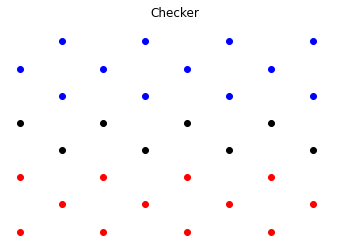

In [3]:
import matplotlib.pyplot as plt
import numpy as np

n_rows = 8
n_cols = 8

radius = 0.3

# x = np.arange(n_cols)
# y = np.arange(n_rows)[::-1]

fig, ax = plt.subplots()


EnColors = ["black","red", "blue", "white"]
for i in range(n_rows):
  for j in range(n_cols):
    colorLabel = toplot[i,j]
    ax.plot(j + radius, i + radius, 'o', color = EnColors[colorLabel])



plt.xlim([0, n_cols])
plt.ylim([0, n_rows])
plt.axis('off')
plt.title('Checker')
plt.show()

In [4]:
# from prompt on chatgpt 3.5 : 
# Create a python function for american checkers game legal moves 



def is_valid_move(board, player, from_pos, to_pos):
    """
    Check if a move is a legal move in American checkers.

    Parameters:
    - board: A 2D list representing the game board.
    - player: Current player (1 for player 1, -1 for player 2).
    - from_pos: Tuple (row, col) representing the starting position of the piece.
    - to_pos: Tuple (row, col) representing the target position of the piece.

    Returns:
    - True if the move is legal, False otherwise.
    """
    row_from, col_from = from_pos
    row_to, col_to = to_pos

    # Check if the target position is within the board boundaries
    if not (0 <= row_to < 8) or not (0 <= col_to < 8):
        return False

    # Check if the target position is empty
    if board[row_to][col_to] != 0:
        return False

    # Check if the piece is moving diagonally
    if abs(row_from - row_to) != 1 or abs(col_from - col_to) != 1:
        return False

    # Check if the piece is moving in the correct direction based on the player
    if player == 1 and row_to < row_from:
        return False
    if player == -1 and row_to > row_from:
        return False

    return True

# Example usage:
board = [
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 0, -1, 0, -1, 0, -1, 0],
    [0, -1, 0, -1, 0, -1, 0, -1],
    [-1, 0, -1, 0, -1, 0, -1, 0]
]

from_position = (5, 0)
to_position = (4, 1)
player = -1

if is_valid_move(board, player, from_position, to_position):
    print("Valid move")
else:
    print("Invalid move")


Valid move


In [10]:
def is_valid_move(board, player, from_pos, to_pos):
    """
    Check if a move is a legal move in American checkers.

    Parameters:
    - board: A 2D list representing the game board.
    - player: Current player (1 for player 1, -1 for player 2).
    - from_pos: Tuple (row, col) representing the starting position of the piece.
    - to_pos: Tuple (row, col) representing the target position of the piece.

    Returns:
    - True if the move is legal, False otherwise.
    """
    row_from, col_from = from_pos
    row_to, col_to = to_pos

    # Check if the target position is within the board boundaries
    if not (0 <= row_to < 8) or not (0 <= col_to < 8):
        return False

    # Check if the target position is empty
    if board[row_to][col_to] != 0:
        return False

    # Check if the piece is moving diagonally
    if abs(row_from - row_to) != 1 or abs(col_from - col_to) != 1:
        return False

    # Check if the piece is moving in the correct direction based on the player
    if player == 1 and row_to < row_from:
        return False
    if player == -1 and row_to > row_from:
        return False

    return True

def is_capture_move(board, player, from_pos, to_pos):
    """
    Check if a move is a capture move (jump) in American checkers.

    Parameters:
    - board: A 2D list representing the game board.
    - player: Current player (1 for player 1, -1 for player 2).
    - from_pos: Tuple (row, col) representing the starting position of the piece.
    - to_pos: Tuple (row, col) representing the target position of the piece.

    Returns:
    - True if the move is a capture move, False otherwise.
    """
    row_from, col_from = from_pos
    row_to, col_to = to_pos

    # Check if the target position is within the board boundaries
    if not (0 <= row_to < 8) or not (0 <= col_to < 8):
        return False

    # Check if the target position is empty
    if board[row_to][col_to] != 0:
        return False

    # Check if the move is jumping over an opponent's piece
    mid_row = (row_from + row_to) // 2
    mid_col = (col_from + col_to) // 2

    if board[mid_row][mid_col] == -player:
        return True

    return False

def promote_to_king(board, player, to_pos):
    """
    Promote a piece to king if it reaches the opposite end of the board.

    Parameters:
    - board: A 2D list representing the game board.
    - player: Current player (1 for player 1, -1 for player 2).
    - to_pos: Tuple (row, col) representing the target position of the piece.
    """
    if (player == 1 and to_pos[0] == 0) or (player == -1 and to_pos[0] == 7):
        board[to_pos[0]][to_pos[1]] = player * 2  # King piece

# Example usage:
board = [
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 0, -1, 0, -1, 0, -1, 0],
    [0, -1, 0, -1, 0, -1, 0, -1],
    [-1, 0, -1, 0, -1, 0, -1, 0]
]

from_position = (2, 1)
to_position = (3, 0)
player = 1

if is_valid_move(board, player, from_position, to_position) and not is_capture_move(board, player, from_position, to_position):
    board[to_position[0]][to_position[1]] = board[from_position[0]][from_position[1]]
    board[from_position[0]][from_position[1]] = 0
    promote_to_king(board, player, to_position)
    print("Valid move")
else:
    print("Invalid move")


Valid move


In [11]:
def make_legal_move(board, from_pos, to_pos):
    """
    Make a legal move on the game board.

    Parameters:
    - board: A 2D list representing the game board.
    - from_pos: Tuple (row, col) representing the starting position of the piece.
    - to_pos: Tuple (row, col) representing the target position of the piece.
    """
    row_from, col_from = from_pos
    row_to, col_to = to_pos

    board[to_pos[0]][to_pos[1]] = board[from_pos[0]][from_pos[1]]
    board[from_pos[0]][from_pos[1]] = 0

def make_capture_move(board, from_pos, to_pos):
    """
    Make a capture move (jump) on the game board.

    Parameters:
    - board: A 2D list representing the game board.
    - from_pos: Tuple (row, col) representing the starting position of the piece.
    - to_pos: Tuple (row, col) representing the target position of the piece after the jump.
    """
    row_from, col_from = from_pos
    row_to, col_to = to_pos

    mid_row = (row_from + row_to) // 2
    mid_col = (col_from + col_to) // 2

    board[to_pos[0]][to_pos[1]] = board[from_pos[0]][from_pos[1]]
    board[from_pos[0]][from_pos[1]] = 0
    board[mid_row][mid_col] = 0  # Remove the captured piece

# Example usage:
# board = [
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 1, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0],
#     [0, 0, 0, 0, 0, 0, 0, 0]
# ]

# from_position = (3, 3)
# to_position = (4, 2)
# player = 1

# if is_valid_move(board, player, from_position, to_position):
#     make_legal_move(board, from_position, to_position)
#     print("Legal move made.")
# elif is_capture_move(board, player, from_position, to_position):
#     make_capture_move(board, from_position, to_position)
#     print("Capture move made.")
# else:
#     print("Invalid move")
# board


def find_legal_moves(board, player):
    """
    Find all legal moves for a player on the game board.

    Parameters:
    - board: A 2D list representing the game board.
    - player: Current player (1 for player 1, -1 for player 2).

    Returns:
    - A list of tuples representing legal moves [(from_pos, to_pos)].
    """
    legal_moves = []

    for row in range(8):
        for col in range(8):
            if board[row][col] == player:
                from_pos = (row, col)
                for row_offset, col_offset in [(1, 1), (1, -1), (-1, 1), (-1, -1)]:
                    to_row = row + row_offset
                    to_col = col + col_offset
                    to_pos = (to_row, to_col)
                    if is_valid_move(board, player, from_pos, to_pos):
                        legal_moves.append((from_pos, to_pos))

    return legal_moves

def find_capture_moves(board, player):
    """
    Find all capture moves (jumps) for a player on the game board.

    Parameters:
    - board: A 2D list representing the game board.
    - player: Current player (1 for player 1, -1 for player 2).

    Returns:
    - A list of tuples representing capture moves [(from_pos, to_pos)].
    """
    capture_moves = []

    for row in range(8):
        for col in range(8):
            if board[row][col] == player:
                from_pos = (row, col)
                for row_offset, col_offset in [(2, 2), (2, -2), (-2, 2), (-2, -2)]:
                    to_row = row + row_offset
                    to_col = col + col_offset
                    to_pos = (to_row, to_col)
                    if is_capture_move(board, player, from_pos, to_pos):
                        capture_moves.append((from_pos, to_pos))

    return capture_moves

find_legal_moves(board, 1)

[((1, 0), (2, 1)),
 ((1, 2), (2, 1)),
 ((2, 3), (3, 4)),
 ((2, 3), (3, 2)),
 ((2, 5), (3, 6)),
 ((2, 5), (3, 4)),
 ((2, 7), (3, 6)),
 ((3, 0), (4, 1))]

In [39]:
import random


board = [
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 0, -1, 0, -1, 0, -1, 0],
    [0, -1, 0, -1, 0, -1, 0, -1],
    [-1, 0, -1, 0, -1, 0, -1, 0]
]
    
def play_random_checkers_game():
    """
    Play a random American checkers game with legal moves and capture moves.
    """



    current_player = 1  # Player 1 starts

    while True:
        legal_moves = find_legal_moves(board, current_player)
        capture_moves = find_capture_moves(board, current_player)

        
        if capture_moves:
            # If there are capture moves available, choose a random capture move
            move = random.choice(capture_moves)
            
            from_pos, to_pos = move
            make_capture_move(board, from_pos, to_pos)
            
        elif legal_moves:
            # If there are no capture moves but there are legal moves, choose a random legal move
            move = random.choice(legal_moves)
            from_pos, to_pos = move
            make_legal_move(board, from_pos, to_pos)
        else:
            # If there are no legal moves, the current player loses
            print("No more legal moves. Player", current_player, "loses.")
            break

        # Check if a player has won
        if not any(1 in row for row in board):
            print("Player 2 wins!")
            break
        if not any(-1 in row for row in board):
            print("Player 1 wins!")
            break

        # Switch to the other player's turn
        current_player *= -1
        
        print(board)


# Play a random game
play_random_checkers_game()

[[0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0], [-1, 0, -1, 0, -1, 0, -1, 0], [0, -1, 0, -1, 0, -1, 0, -1], [-1, 0, -1, 0, -1, 0, -1, 0]]
[[0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0, 0, 1], [0, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1], [-1, 0, -1, 0, -1, 0, 0, 0], [0, -1, 0, -1, 0, -1, 0, -1], [-1, 0, -1, 0, -1, 0, -1, 0]]
[[0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, -1], [-1, 0, -1, 0, -1, 0, 0, 0], [0, -1, 0, -1, 0, -1, 0, -1], [-1, 0, -1, 0, -1, 0, -1, 0]]
[[0, 1, 0, 1, 0, 1, 0, 1], [1, 0, 1, 0, 1, 0, 1, 0], [0, 0, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0], [0, -1, 0, 0, 0, 0, 0, -1], [0, 0, -1, 0, -1, 0, 0, 0], [0, -1, 0, -1, 0, -1, 0, -1], [-1, 0, -1, 0, -1, 0, -1, 0]]
[[0, 1, 0, 1, 0, 1, 0, 1], [0, 0, 1, 0, 1, 0, 1, 0], [0, 1, 0, 1, 0, 0, 0, 1], [1, 0, 0, 0, 1, 0, 0, 0], [0, -1, 0, 

In [44]:
def make_capture_move(board, from_pos, to_pos, player):
    """
    Make a capture move (jump) on the game board and capture the maximum number of opponent pieces.

    Parameters:
    - board: A 2D list representing the game board.
    - from_pos: Tuple (row, col) representing the starting position of the piece.
    - to_pos: Tuple (row, col) representing the target position of the piece after the jump.
    - player: Current player (1 for player 1, -1 for player 2).
    """
    row_from, col_from = from_pos
    row_to, col_to = to_pos

    mid_row = (row_from + row_to) // 2
    mid_col = (col_from + col_to) // 2

    board[to_pos[0]][to_pos[1]] = board[from_pos[0]][from_pos[1]]
    board[from_pos[0]][from_pos[1]] = 0
    board[mid_row][mid_col] = 0  # Remove the captured piece

    # Check if there are more capture moves
    capture_moves = find_capture_moves(board, player, to_pos)
    if capture_moves:
        # Recursively make the next capture moves
        for move in capture_moves:
            make_capture_move(board, to_pos, move[1], player)

# Example usage:
board = [
    [0, 1, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, -1, 0, -1, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0]
]

from_position = (0, 1)
to_position = (3, 3)
player = 1

if is_capture_move(board, player, from_position, to_position):
    make_capture_move(board, from_position, to_position, player)
    print("Capture move made.")
    # Print the updated board
    for row in board:
        print(row)


TypeError: find_capture_moves() takes 2 positional arguments but 3 were given

In [50]:
import tkinter as tk

board = [
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 0, -1, 0, -1, 0, -1, 0],
    [0, -1, 0, -1, 0, -1, 0, -1],
    [-1, 0, -1, 0, -1, 0, -1, 0]
]

# Constants
CELL_SIZE = 80  # Size of each cell in pixels
BOARD_SIZE = 8  # Size of the game board (8x8)
WHITE_COLOR = "#FFFFFF"
BLACK_COLOR = "#000000"

class CheckersGUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Checkers Game")

        self.canvas = tk.Canvas(root, width=CELL_SIZE * BOARD_SIZE, height=CELL_SIZE * BOARD_SIZE)
        self.canvas.pack()

#         self.board = [[0] * BOARD_SIZE for _ in range(BOARD_SIZE)]  # Initialize an empty board


        self.board = board
        # Place pieces on the board
#         self.board[1][0] = -1
#         self.board[2][1] = -1
#         self.board[3][0] = -1
#         self.board[6][1] = 1
#         self.board[5][2] = 1
#         self.board[4][1] = 1

        self.draw_board()
        self.draw_pieces()

    def draw_board(self):
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                color = WHITE_COLOR if (row + col) % 2 == 0 else BLACK_COLOR
                x1, y1 = col * CELL_SIZE, row * CELL_SIZE
                x2, y2 = x1 + CELL_SIZE, y1 + CELL_SIZE
                self.canvas.create_rectangle(x1, y1, x2, y2, fill=color)

    def draw_pieces(self):
        for row in range(BOARD_SIZE):
            for col in range(BOARD_SIZE):
                piece = self.board[row][col]
                if piece == 1:
                    self.draw_piece(row, col, "red")
                elif piece == -1:
                    self.draw_piece(row, col, "blue")

    def draw_piece(self, row, col, color):
        x1, y1 = col * CELL_SIZE, row * CELL_SIZE
        x2, y2 = x1 + CELL_SIZE, y1 + CELL_SIZE
        self.canvas.create_oval(x1 + 10, y1 + 10, x2 - 10, y2 - 10, fill=color)

if __name__ == "__main__":
    root = tk.Tk()
    app = CheckersGUI(root)
    root.mainloop()


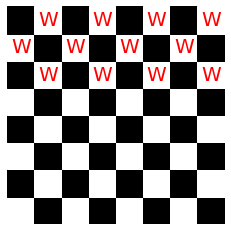

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Create a function to draw the checkerboard with pieces from a Board array
def draw_checkerboard(board):
    fig, ax = plt.subplots()
    ax.set_aspect('equal')

    # Draw the checkerboard squares
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                color = 'white'
            else:
                color = 'black'

            square = plt.Rectangle((i, j), 1, 1, color=color)
            ax.add_patch(square)

    # Place pieces on the checkerboard
    for i in range(3):
        for j in range(8):
            piece = board[i][j]
            if piece == 'W':
                ax.text(j + 0.5, 7 - i + 0.5, 'W', fontsize=20, color='red', ha='center', va='center')
            elif piece == 'B':
                ax.text(j + 0.5, 7 - i + 0.5, 'B', fontsize=20, color='blue', ha='center', va='center')

    
    
#     ax.text(5 + 0.5, 0 + 0.5, 'B', fontsize=20, color='blue', ha='center', va='center')
    
    
    # Set axis limits and remove axis labels
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.axis('off')

    plt.show()

# Example board array with 'W' and 'B' representing white and black pieces
board_array = [
    [' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W'],
    ['W', ' ', 'W', ' ', 'W', ' ', 'W', ' '],
    [' ', 'W', ' ', 'W', ' ', 'W', ' ', 'W'],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    [' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
    ['B', ' ', 'B', ' ', 'B', ' ', 'B', ' '],
    [' ', 'B', ' ', 'B', ' ', 'B', ' ', 'B'],
    ['B', ' ', 'B', ' ', 'B', ' ', 'B', ' '],
]

# Call the function to draw the checkerboard with pieces
draw_checkerboard(board_array)


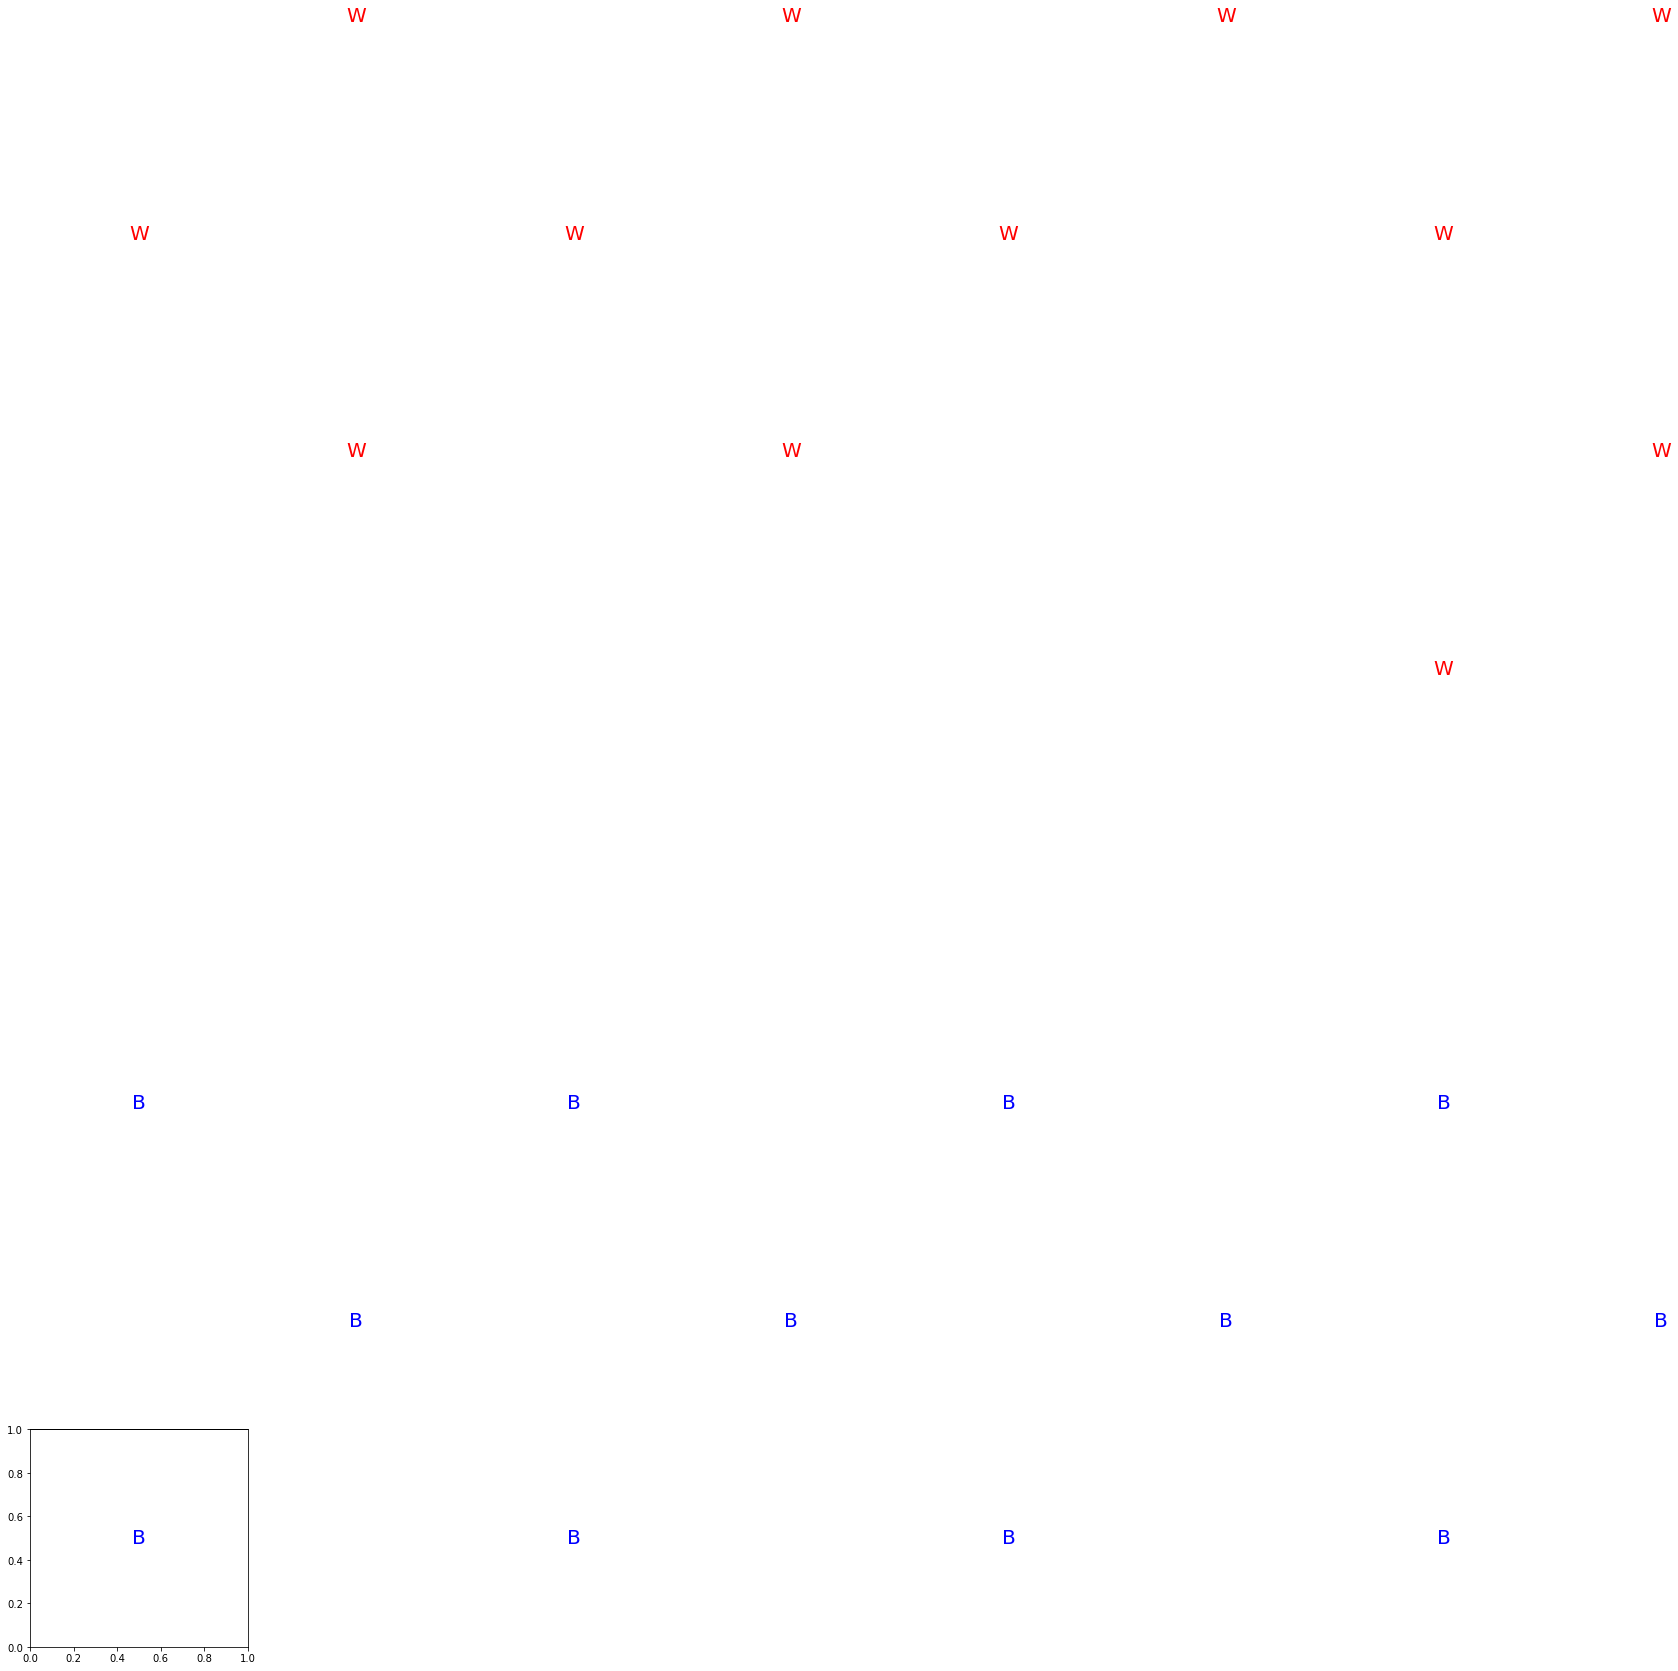

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from IPython.display import HTML  # Import the HTML class for IPython display

boards =  np.array([[
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 1, 0, 1],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 0, -1, 0, -1, 0, -1, 0],
    [0, -1, 0, -1, 0, -1, 0, -1],
    [-1, 0, -1, 0, -1, 0, -1, 0]],
    
    [
    [0, 1, 0, 1, 0, 1, 0, 1],
    [1, 0, 1, 0, 1, 0, 1, 0],
    [0, 1, 0, 1, 0, 0, 0, 1],
    [0, 0, 0, 0, 0, 0, 1, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [-1, 0, -1, 0, -1, 0, -1, 0],
    [0, -1, 0, -1, 0, -1, 0, -1],
    [-1, 0, -1, 0, -1, 0, -1, 0]]
])






# Create a function to draw the checkerboard with pieces from a Board array
fig, ax = plt.subplots()
ax.set_aspect('equal')




def update(frame):
    ax.cla()
    board = boards[frame]
    


    # Place pieces on the checkerboard
    for i in range(8):
        for j in range(8):
            if (i + j) % 2 == 0:
                color = 'white'
            else:
                color = 'black'

            square = plt.Rectangle((i, j), 1, 1, color=color)
            ax.add_patch(square)
            piece = board[i][j]
            if piece == 1:
                ax.text(j + 0.5, 7 - i + 0.5, 'W', fontsize=20, color='red', ha='center', va='center')
            elif piece == -1:
                ax.text(j + 0.5, 7 - i + 0.5, 'B', fontsize=20, color='blue', ha='center', va='center')


# Set axis limits and remove axis labels
ax.set_xlim(0, 8)
ax.set_ylim(0, 8)
ax.axis('off')
# Create the animation object
ani = FuncAnimation(fig, update, frames=len(boards), blit=False)

# Display the animation in the Jupyter Notebook or IPython
HTML(ani.to_jshtml())


In [ ]:
matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create a figure and axes
fig = plt.figure(figsize=(12,5))
ax1 = plt.subplot(1,2,1)   
ax2 = plt.subplot(1,2,2)

# set up the subplots as needed
ax1.set_xlim(( 0, 2))            
ax1.set_ylim((-2, 2))
ax1.set_xlabel('Time')
ax1.set_ylabel('Magnitude')

ax2.set_xlim((-2,2))
ax2.set_ylim((-2,2))
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Phase Plane')

# create objects that will change in the animation. These are
# initially empty, and will be given new values for each frame
# in the animation.
txt_title = ax1.set_title('')
line1, = ax1.plot([], [], 'b', lw=2)     # ax.plot returns a list of 2D line objects
line2, = ax1.plot([], [], 'r', lw=2)
pt1, = ax2.plot([], [], 'g.', ms=20)
line3, = ax2.plot([], [], 'y', lw=2)

ax1.legend(['sin','cos']);

